In [25]:
import graphviz
from IPython.display import Image

In [26]:
example_strings = [
    'A/B/C/D',
    'A/B/C2/D2',
    'A/B/C2/D3',
    'A/B2/C3/D4',
    'A/B2/C4',
    'A/B2/C3/D5',
]

In [29]:
class Vertex:
    def __init__(self, name):
        self.name = name
        self.children = set()

class Graph:
    def __init__(self):
        self.vertices = dict()
        
    def has_vertex(self, name):
        return name in self.vertices
    
    def add_vertex(self, name):
        if self.has_vertex(name):
            raise Exception('trying to overwrite vertex!')
        self.vertices[name] = set()
    
    def add_edge(self, head_name, tail_name):
        '''
        Adds an edge between vertices, creating the vartices
        if they don't exist yet.
        '''
        if not self.has_vertex(head_name):
            self.add_vertex(head_name)
        if not self.has_vertex(tail_name):
            self.add_vertex(tail_name)
        self.vertices[head_name].add(tail_name)
    
    def get_graphviz_object(self):
        digraph = graphviz.Digraph(format='png')
        for node_name in self.vertices.keys():
            digraph.node(node_name)
            
        for start_name, end_names in self.vertices.items():
            for end_name in end_names:
                digraph.edge(start_name, end_name)
        
        return digraph

In [30]:
g = Graph()
for s in example_strings:
    parent_child_list = s.split('/')
    for i in range(len(parent_child_list)-1):
        parent_value, child_value = parent_child_list[i], parent_child_list[i+1]
        g.add_edge(parent_value, child_value)

In [34]:
g.get_graphviz_object().render('directed_graph', view=False)

'directed_graph.png'

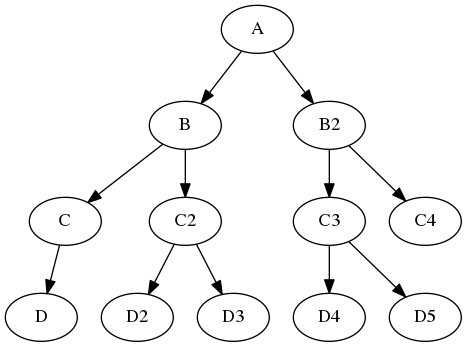

In [35]:
Image('directed_graph.png')